In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [3]:
#Loading Datasets
df = pd.read_csv('/Users/rahulkumania/Desktop/UDEMY_TSA_FINAL/Data/RestaurantVisitors.csv',
                index_col="date",
                parse_dates= True)
df.index.freq = "D"

In [4]:
df.head()
##FOR EXOGENOUS VARIABLE WE GONNA
##SEE IF HOLIDAY COLUMN AFFECTS TOTAL COLUMN

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
len(df)

517

### Dropping Null Values

df1 = df.dropna()

In [6]:
df1 = df.dropna()

In [7]:
len(df1)

478

In [8]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [9]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       478 non-null    object 
 1   holiday       478 non-null    int64  
 2   holiday_name  478 non-null    object 
 3   rest1         478 non-null    float64
 4   rest2         478 non-null    float64
 5   rest3         478 non-null    float64
 6   rest4         478 non-null    float64
 7   total         478 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ KB


#### Changing 'rest1', 'rest2', 'rest3', 'rest4', 'total' columsn dtype to int

In [11]:
cols = ['rest1', 'rest2', 'rest3','rest4', 'total']

In [12]:
for column in cols:
    df1[column] = df1[column].astype(int)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int64 
 4   rest2         478 non-null    int64 
 5   rest3         478 non-null    int64 
 6   rest4         478 non-null    int64 
 7   total         478 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 33.6+ KB


### Visualizing the data

<AxesSubplot:xlabel='date'>

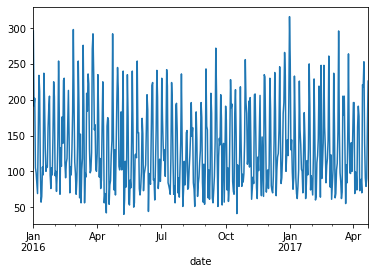

In [14]:
df1['total'].plot()

In [15]:
#Index when there is a holdiay 
df1.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [16]:
df1[df1['holiday']==1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

### Adding a vertical line on the holidays

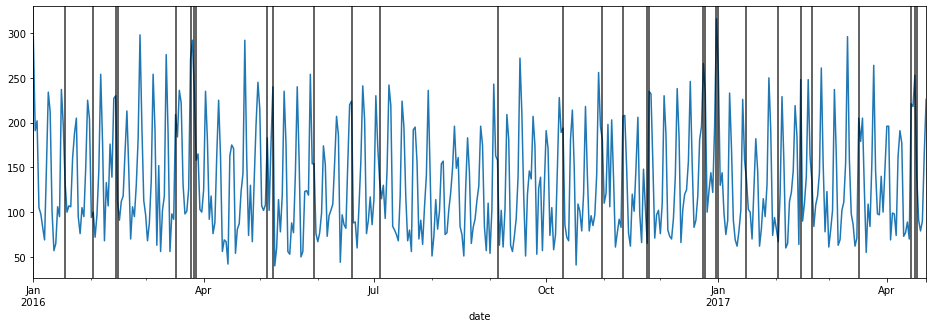

In [17]:
ax = df1['total'].plot(figsize=(16,5))

for day in df1[df1['holiday']==1].index:
    ax.axvline(x=day, color="black", alpha=0.8);

### ETS Decomposition

In [18]:
result_1 = seasonal_decompose(df1["total"])

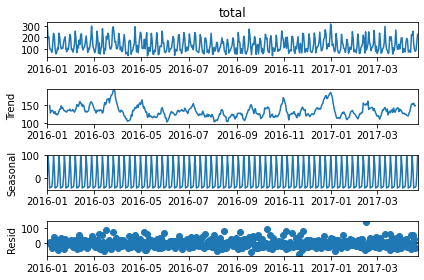

In [19]:
result_1.plot();
#ETS shows very strong seasonal component

<AxesSubplot:xlabel='date'>

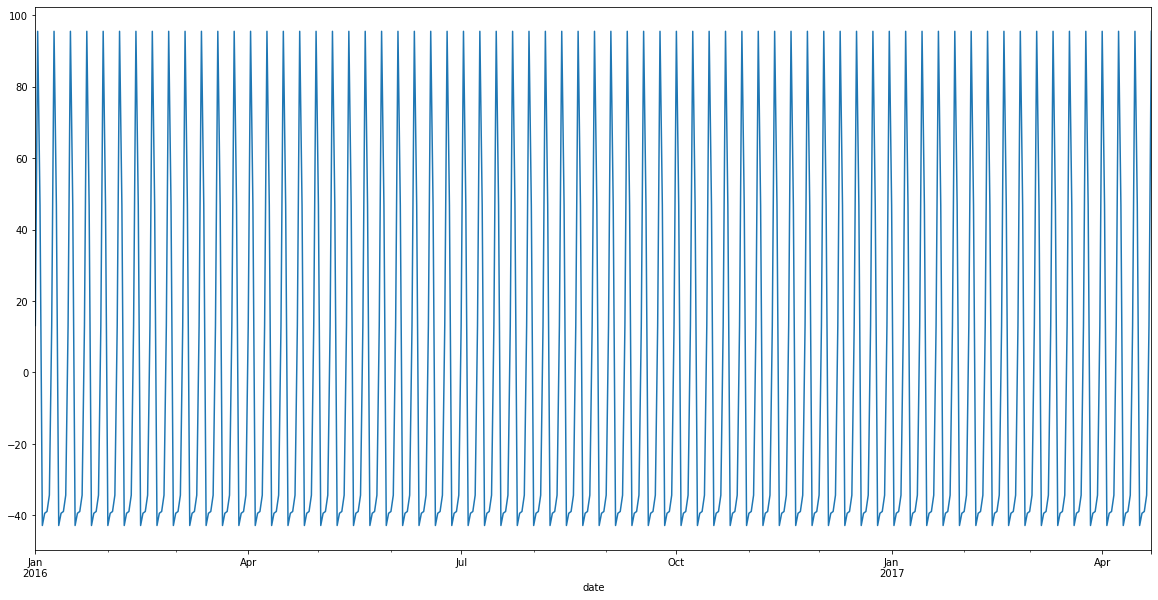

In [20]:
result_1.seasonal.plot(figsize=(20,10))
#It reveals that the datatset has a seasonality based on weekdays and weekends

# FIRST PERFORMING SARIMA ON IT

# SARIMA

In [21]:
auto_arima(df1['total'], seasonal = True, m = 7, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.30 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=0.78 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4790.741, Time=0.45 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.24 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4948.181, Time=0.84 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.40 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4773.774, Time=0.43 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5093.13

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2382.887
Date:                   Mon, 27 Feb 2023   AIC                           4773.774
Time:                           18:49:23   BIC                           4790.452
Sample:                       01-01-2016   HQIC                          4780.331
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.2127      1.611      2.615      0.009       1.055       7.371
ar.S.L7        0.9655      0.013     76.342      0.000       0.941       0.990
ma.S.L7       -0.7618      0.050    -15.272      0.000      -0.860      -0.664
sigma2      1256.1556     76.785     16.359      0.000    1105.659    1406.652
===================================================================================
Ljung-Box (L1) (Q):                  15.79   Jarque-Bera (JB):                67.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.76
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### test and train set split

In [22]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [23]:
#ValueError: non=invertible startiing MA parameters found then do 
 
result_2 = SARIMAX(train['total'], order = (0,0,0), 
                   seasonal_order=(1, 0, 1, 7))

In [24]:
model_1 = result_2.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.01719D+00    |proj g|=  8.65114D-02

At iterate    5    f=  4.98913D+00    |proj g|=  3.10711D-02

At iterate   10    f=  4.97484D+00    |proj g|=  1.66063D-02

At iterate   15    f=  4.96669D+00    |proj g|=  5.66674D-04

At iterate   20    f=  4.96644D+00    |proj g|=  2.76685D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   2.767D-06   4.966D+00
  F =   4.9664421020411407     

CONVERG

 This problem is unconstrained.


In [25]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Mon, 27 Feb 2023   AIC                           4336.738
Time:                           18:49:24   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.58e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9383      0.024    -39.199      0.000      -0.985      -0.891
sigma2      1111.8044     58.739     18.928      0.000     996.679    1226.930
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predictions

In [26]:
start_1 = len(train)
end_1 = len(train) + len(test)-1

In [27]:
prediction_1 = model_1.predict(start = start_1, end= end_1, typ="levels").rename("SARIMA Predictions")

In [28]:
prediction_1

2017-03-12    172.104602
2017-03-13     87.860785
2017-03-14     99.908162
2017-03-15     96.840262
2017-03-16     98.639340
2017-03-17    140.727899
2017-03-18    235.749937
2017-03-19    172.087205
2017-03-20     87.851903
2017-03-21     99.898063
2017-03-22     96.830473
2017-03-23     98.629369
2017-03-24    140.713674
2017-03-25    235.726106
2017-03-26    172.069810
2017-03-27     87.843023
2017-03-28     99.887964
2017-03-29     96.820685
2017-03-30     98.619399
2017-03-31    140.699450
2017-04-01    235.702278
2017-04-02    172.052416
2017-04-03     87.834143
2017-04-04     99.877867
2017-04-05     96.810898
2017-04-06     98.609430
2017-04-07    140.685228
2017-04-08    235.678453
2017-04-09    172.035025
2017-04-10     87.825265
2017-04-11     99.867771
2017-04-12     96.801112
2017-04-13     98.599462
2017-04-14    140.671007
2017-04-15    235.654630
2017-04-16    172.017635
2017-04-17     87.816387
2017-04-18     99.857677
2017-04-19     96.791327
2017-04-20     98.589496


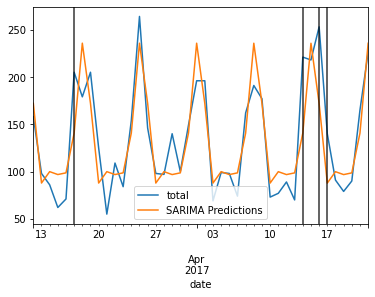

In [33]:
ax1 = test['total'].plot(legend=True)
prediction_1.plot(legend= True)

##PUTTING A VERTICAL LINE ON THE HOLIDAYS
for day in test[test['holiday']==1].index:
    ax1.axvline(x=day, color="black", alpha=0.8);

In [30]:
from statsmodels.tools.eval_measures import rmse

In [31]:
rmse(test['total'], prediction_1)

31.913832545222512

# FORECASTING IN FUTURE

In [34]:
result_3 = SARIMAX(df1['total'], order = (0,0,0), 
                   seasonal_order=(1, 0, 1, 7))

In [35]:
model_2 = result_3.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00463D+00    |proj g|=  8.57960D-02

At iterate    5    f=  4.96621D+00    |proj g|=  7.63317D-04

At iterate   10    f=  4.95720D+00    |proj g|=  4.13664D-03

At iterate   15    f=  4.95602D+00    |proj g|=  8.21109D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     24      1     0     0   9.516D-06   4.956D+00
  F =   4.9560108758888628     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [36]:
forecast = model_2.predict(start = len(df1), end =len(df1)+31, 
                           typ="levels").rename("SARIMA FORECASTING")

<AxesSubplot:xlabel='date'>

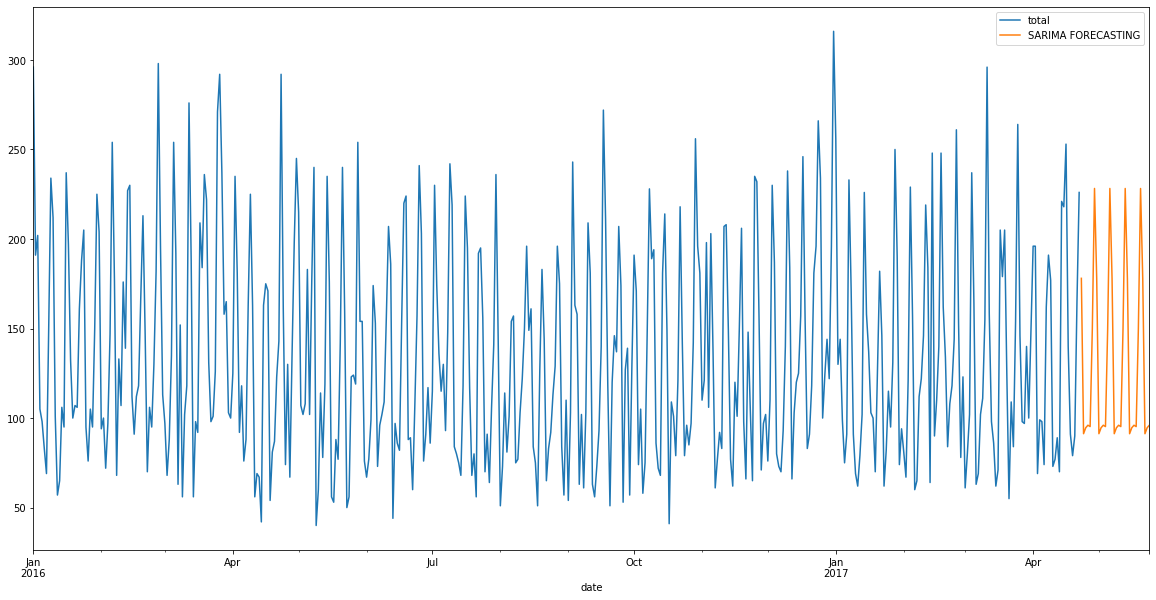

In [39]:
df1['total'].plot(legend=True, figsize = (20,10))
forecast.plot(legend=True)